In [1]:
import matplotlib.pyplot as plt
import numpy as np
from stock_market_env import StockMarketEnv
from trading_agent import LinearQTradingAgent

# Simulated stock prices
prices = np.random.default_rng().normal(100, 1.5, 1000)  # Random walk stock prices
price_changes_pct = (prices[1:] / prices[:-1]) - 1

Episode 0, Total Reward: -38.93475443575204, Epsilon: 0.9950
Episode 100, Total Reward: -37.30879895750819, Epsilon: 0.6027
Episode 200, Total Reward: -34.508271150259226, Epsilon: 0.3651
Episode 300, Total Reward: -33.13875041067305, Epsilon: 0.2212
Episode 400, Total Reward: -26.938066553429753, Epsilon: 0.1340
Episode 500, Total Reward: -30.647590333231133, Epsilon: 0.0812
Episode 600, Total Reward: -24.055168840387836, Epsilon: 0.0492
Episode 700, Total Reward: -28.786006565452738, Epsilon: 0.0298
Episode 800, Total Reward: -28.16281352301636, Epsilon: 0.0180
Episode 900, Total Reward: -27.250093427884188, Epsilon: 0.0109
Episode 1000, Total Reward: -25.500560059783528, Epsilon: 0.0100
Episode 1100, Total Reward: -26.465881357732442, Epsilon: 0.0100
Episode 1200, Total Reward: -26.870933434968727, Epsilon: 0.0100
Episode 1300, Total Reward: -27.06069008057891, Epsilon: 0.0100
Episode 1400, Total Reward: -27.588365817185146, Epsilon: 0.0100


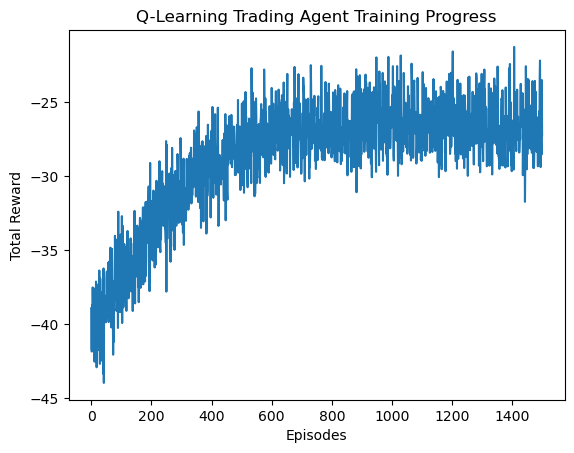

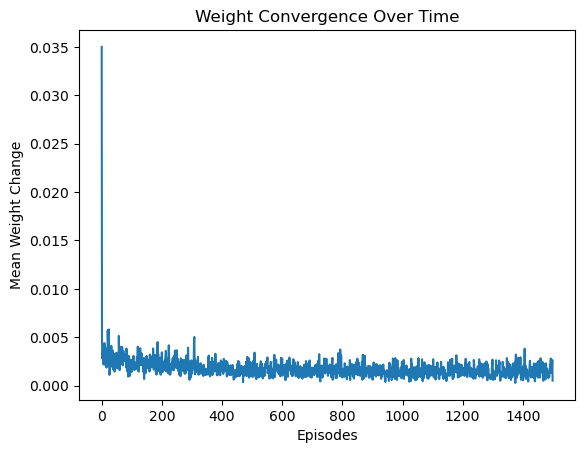

In [2]:
# Create the environment
env = StockMarketEnv(prices)

# Train the agent
state_size = 3  # 5 features: return, SMA, EMA, RSI, volatility
action_size = 3  # Actions: Buy, Hold, Sell
agent = LinearQTradingAgent(env, state_size, action_size, alpha=0.01)
rewards = agent.train(episodes=1500)

# print(agent.weights)

# Plot training progress
plt.plot(rewards)
plt.xlabel("Episodes")
plt.ylabel("Total Reward")
plt.title("Q-Learning Trading Agent Training Progress")
plt.show()

plt.plot(agent.weight_changes)
plt.xlabel("Episodes")
plt.ylabel("Mean Weight Change")
plt.title("Weight Convergence Over Time")
plt.show()

Episode 0, Total Reward: -5544.130780292473, Epsilon: 0.0100
Episode 100, Total Reward: 359.363831734946, Epsilon: 0.0100
Episode 200, Total Reward: -2725.7498052471556, Epsilon: 0.0100
Episode 300, Total Reward: -3017.293453702298, Epsilon: 0.0100
Episode 400, Total Reward: -3698.4840806699526, Epsilon: 0.0100
Episode 500, Total Reward: -1671.3547241553251, Epsilon: 0.0100
Episode 600, Total Reward: -780.9283746911516, Epsilon: 0.0100
Episode 700, Total Reward: -1944.1770243667988, Epsilon: 0.0100
Episode 800, Total Reward: -145.97613318894446, Epsilon: 0.0100
Episode 900, Total Reward: 790.4772958681465, Epsilon: 0.0100
[[ -15.1935736  -258.30366457   26.60727179]
 [  38.77165653 -159.25238238  -68.46515425]
 [   2.50524988   17.83200302   22.82454067]]


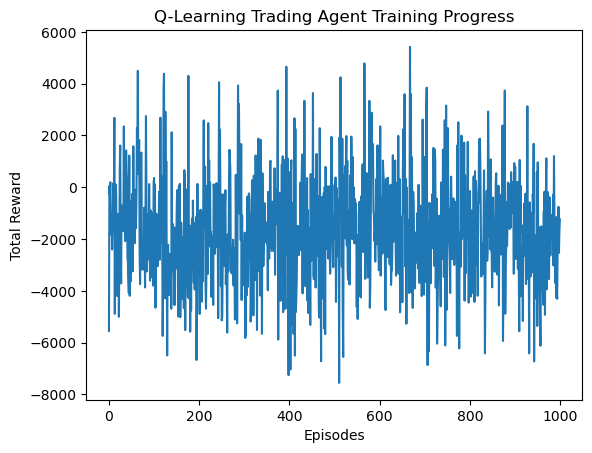

In [5]:
rewards = agent.train(episodes=1000)

print(agent.weights)

# Plot training progress
plt.plot(rewards)
plt.xlabel("Episodes")
plt.ylabel("Total Reward")
plt.title("Q-Learning Trading Agent Training Progress")
plt.show()

In [6]:
print(agent.weights)


[[ -15.1935736  -258.30366457   26.60727179]
 [  38.77165653 -159.25238238  -68.46515425]
 [   2.50524988   17.83200302   22.82454067]]


In [ ]:
prices = np.random.uniform(0, 10, 5) # Random walk stock prices
prices

array([2.32208128, 9.19562353, 7.35984651, 6.5657412 , 4.7785389 ])

In [7]:
env.prices

array([100.26961056,  98.80008711,  98.46228854,  98.32890243,
        99.84787353,  97.6017017 ,  96.96319583,  96.03291171,
        96.9149997 ,  97.08559153,  96.52210944,  95.90942777,
        95.12978089,  96.49592941,  97.73475276,  98.68810329,
       100.31714178,  99.59473505,  99.22707127,  99.97225519,
        98.69719572,  97.03893435,  96.50913288,  96.48149357,
        96.75264396,  96.94920933,  96.04972541,  95.84369672,
        95.52744419,  97.42700735,  96.35506363,  95.36745711,
        93.42797437,  93.62944789,  93.27287146,  93.18533665,
        96.16527655,  97.91408933,  96.60557578,  94.83303921,
        94.77428475,  95.41320164,  96.6017302 ,  96.33882051,
        97.2983515 ,  98.45021407,  96.54274301,  96.99594312,
        96.03593307,  96.99487635,  97.87126088, 100.78909253,
       102.38511769, 102.6266674 , 102.2281297 , 101.59219094,
       100.98973641, 102.21591556, 104.32518418, 103.68250376,
       103.18522112, 102.64927253, 101.50512747, 101.62

In [24]:
print(prices[1:])
print(prices[:-1])
print(prices[1:] / prices[:-1])

print(np.array([prices[1:]]))
tuplized = tuple(map(tuple, np.array([prices[1:]])))
print(tuplized)

test_dir = {
    tuplized: 1,
}

test_dir[tuplized]

[100.11090917 100.68725736  99.46731396  98.28597495]
[100.67165666 100.11090917 100.68725736  99.46731396]
[0.99442994 1.0057571  0.98788384 0.98812334]
[[100.11090917 100.68725736  99.46731396  98.28597495]]
((np.float64(100.1109091691082), np.float64(100.68725735641885), np.float64(99.46731395974697), np.float64(98.28597495302475)),)


1

In [3]:
def test_agent(agent, env):
    """Run a test episode with the trained agent"""
    state = env.reset()
    done = False
    total_reward = 0
    agent.epsilon = 0

    while not done:
        action = agent.choose_action(state)
        state, reward, done = env.step(action)
        total_reward += reward

    return total_reward

# Test the trained agent
final_reward = test_agent(agent, env)
print("Final Test Reward:", final_reward)

Final Test Reward: -47.324520184684985
